In [10]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# for the yeo-johnson transformation
import scipy.stats as stats

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to save the trained scaler class
import joblib

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [11]:
# load dataset
data = pd.read_csv('./input/train.csv')

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head()

(1642, 10)


,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000


In [12]:
data = data.drop(columns=['wheel'])


In [15]:
def convert_to_km(x):
    if 'km' in x:
        return float(x.split()[0])
    elif 'miles' in x:
        return float(x.split()[0]) * 1.60934  # Conversión de millas a km
    
data['running'] = data['running'].apply(convert_to_km)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['year', 'motor_volume', 'running', 'price']] = scaler.fit_transform(data[['year', 'motor_volume', 'running', 'price']])


In [17]:
data['motor_volume'].fillna(data['motor_volume'].median(), inplace=True)
data['status'].fillna(data['status'].mode()[0], inplace=True)


C:\Users\Usuario\AppData\Local\Temp\ipykernel_13472\2120029172.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['motor_volume'].fillna(data['motor_volume'].median(), inplace=True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_13472\2120029172.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [18]:
# Mapeo manual de 'status'
status_map = {
    'excellent': 3,
    'good': 2,
    'fair': 1,
    'poor': 0
}

data['status'] = data['status'].map(status_map)


In [19]:
# Mapeo manual de 'type'
type_map = {
    'sedan': 1,
    'hatchback': 2,
    'coupe': 3,
    'suv': 4,
    'pickup': 5,
    'convertible': 6,
    'wagon': 7
}

data['type'] = data['type'].map(type_map)


In [20]:
from sklearn.preprocessing import LabelEncoder

# Creamos el objeto LabelEncoder
label_encoder = LabelEncoder()

# Aplicamos el encoding a las columnas categóricas
data['model'] = label_encoder.fit_transform(data['model'])
data['motor_type'] = label_encoder.fit_transform(data['motor_type'])
data['color'] = label_encoder.fit_transform(data['color'])


In [21]:
data.head()



,model,year,motor_type,running,color,type,status,motor_volume,price
0,4,1.092431,3,-1.201305,15,1.0,3.0,-0.138416,1.187272
1,2,-0.122347,3,0.132210,1,1.0,3.0,-0.138416,1.326666
2,1,0.485042,3,0.348129,10,1.0,3.0,-0.138416,-0.596974
3,2,-1.944514,3,1.046853,6,1.0,3.0,4.604810,-0.555156
4,2,0.333195,3,0.111535,1,1.0,2.0,-0.138416,1.396363


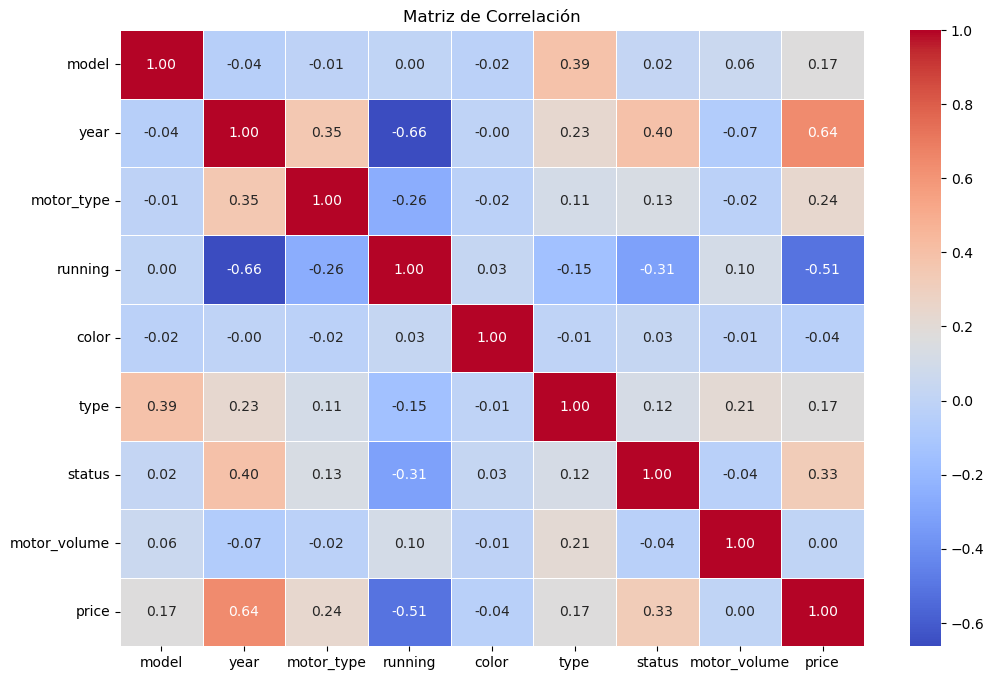

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlación entre las variables numéricas
corr_matrix = data.corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


In [23]:
data.head()


,model,year,motor_type,running,color,type,status,motor_volume,price
0,4,1.092431,3,-1.201305,15,1.0,3.0,-0.138416,1.187272
1,2,-0.122347,3,0.132210,1,1.0,3.0,-0.138416,1.326666
2,1,0.485042,3,0.348129,10,1.0,3.0,-0.138416,-0.596974
3,2,-1.944514,3,1.046853,6,1.0,3.0,4.604810,-0.555156
4,2,0.333195,3,0.111535,1,1.0,2.0,-0.138416,1.396363


In [27]:
import pandas as pd

# Cargar los datos
X_train = pd.read_csv('./input/train.csv')
X_test = pd.read_csv('./input/test.csv')

# Mostrar las primeras filas de cada archivo
print("Primeras filas de X_train:")
display(X_train.head())

print("\nPrimeras filas de X_test:")
display(X_test.head())

# Opcionalmente, mostrar información general de las columnas y tipos de datos
print("\nInformación de X_train:")
print(X_train.info())

print("\nInformación de X_test:")
print(X_test.info())


Primeras filas de X_train:


,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000



Primeras filas de X_test:


,Id,model,year,motor_type,running,wheel,color,type,status,motor_volume
0,0,kia,2020,petrol,24000 km,left,black,sedan,excellent,2.0
1,1,nissan,2017,petrol,85000 miles,left,white,suv,excellent,2.0
2,2,hyundai,2021,petrol,30000 miles,left,white,sedan,excellent,2.0
3,3,kia,2018,petrol,53000 miles,left,silver,sedan,excellent,2.0
4,4,mercedes-benz,2003,petrol,230000 km,left,black,Universal,normal,1.8



Información de X_train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB
None

Información de X_test:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            411 non-null    int64  
 1   model         411 no

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Crear imputadores para las columnas categóricas y numéricas
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Moda para columnas categóricas
numerical_imputer = SimpleImputer(strategy='mean')            # Media para columnas numéricas

# Identificar las columnas con valores nulos
categorical_cols = ['type', 'status']  # Ambas se pueden tratar como categóricas
numerical_cols = []  # Ninguna columna numérica parece tener valores nulos

# Crear un pipeline para imputación
imputation_pipeline = Pipeline([
    ('categorical_imputer', SimpleImputer(strategy='most_frequent')),
])

# Imputar valores nulos en las columnas categóricas
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# Si hubiese columnas numéricas con valores nulos, se imputarían así:
# X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
# X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

# Verificar si quedan valores nulos
print(X_train.isnull().sum())
print(X_test.isnull().sum())


model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
price           0
dtype: int64
Id              0
model           0
year            0
motor_type      0
running         0
wheel           0
color           0
type            0
status          0
motor_volume    0
dtype: int64


In [29]:
from sklearn.model_selection import train_test_split

# Dividir el dataset en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Restablecer índices después de dividir
train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)


In [30]:
# Asegúrate de que train_data y test_data estén definidos
if 'train_data' not in locals() or 'test_data' not in locals():
    print("Error: Los conjuntos de datos de entrenamiento y prueba no están definidos.")
else:
    # Guardar conjuntos procesados
    train_data.to_csv('./output/train_feature_engineered.csv', index=False)
    test_data.to_csv('./output/test_feature_engineered.csv', index=False)

    # Guardar el scaler
    if 'scaler' in locals():
        joblib.dump(scaler, './output/scaler.pkl')
        print("Conjuntos de datos y scaler guardados exitosamente.")
    else:
        print("El scaler no está definido, pero los conjuntos de datos se guardaron.")


Conjuntos de datos y scaler guardados exitosamente.
